In [18]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [19]:
# Load YOLOv8 model (use 'yolov8n.pt' for speed, or 'yolov8m.pt' for better accuracy)
model = YOLO('yolov8m.pt')

# COCO class IDs for vehicles
vehicle_classes = [2, 3, 5, 7]

# Function to classify traffic level based on vehicle count
def classify_traffic(count):
    if count <= 5:
        return "Low"
    elif count <= 15:
        return "Medium"
    else:
        return "High"

In [20]:
# Provide the paths to your video files
video_paths = ['D:/TrafficFlow-AI/Demo Video/junction_1.mp4', 'D:/TrafficFlow-AI/Demo Video/junction_2.mp4', 'D:/TrafficFlow-AI/Demo Video/junction_3.mp4', 'D:/TrafficFlow-AI/Demo Video/junction_4.mp4']

In [21]:
results = []

for path in video_paths:
    cap = cv2.VideoCapture(path)
    
    if not cap.isOpened():
        results.append(("Error loading video", None))
        continue

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    mid_frame = total_frames // 2  # Pick a frame from middle
    cap.set(cv2.CAP_PROP_POS_FRAMES, mid_frame)

    ret, frame = cap.read()
    cap.release()

    if not ret:
        results.append(("Error reading frame", None))
        continue

    # Perform vehicle detection
    detection = model(frame)
    vehicle_count = sum(int(box.cls) in vehicle_classes for box in detection[0].boxes)

    # Classify traffic level
    traffic_level = classify_traffic(vehicle_count)

    # Annotate frame
    annotated = detection[0].plot()
    cv2.putText(annotated, f"Traffic: {traffic_level}", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)

    results.append((traffic_level, annotated))


0: 384x640 10 cars, 3 trucks, 514.8ms
Speed: 5.3ms preprocess, 514.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 19 cars, 6 trucks, 703.7ms
Speed: 3.6ms preprocess, 703.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 6 cars, 1 bus, 2 trucks, 1 traffic light, 1 horse, 1 handbag, 796.5ms
Speed: 3.3ms preprocess, 796.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 640x384 19 cars, 3 trucks, 856.5ms
Speed: 3.3ms preprocess, 856.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)


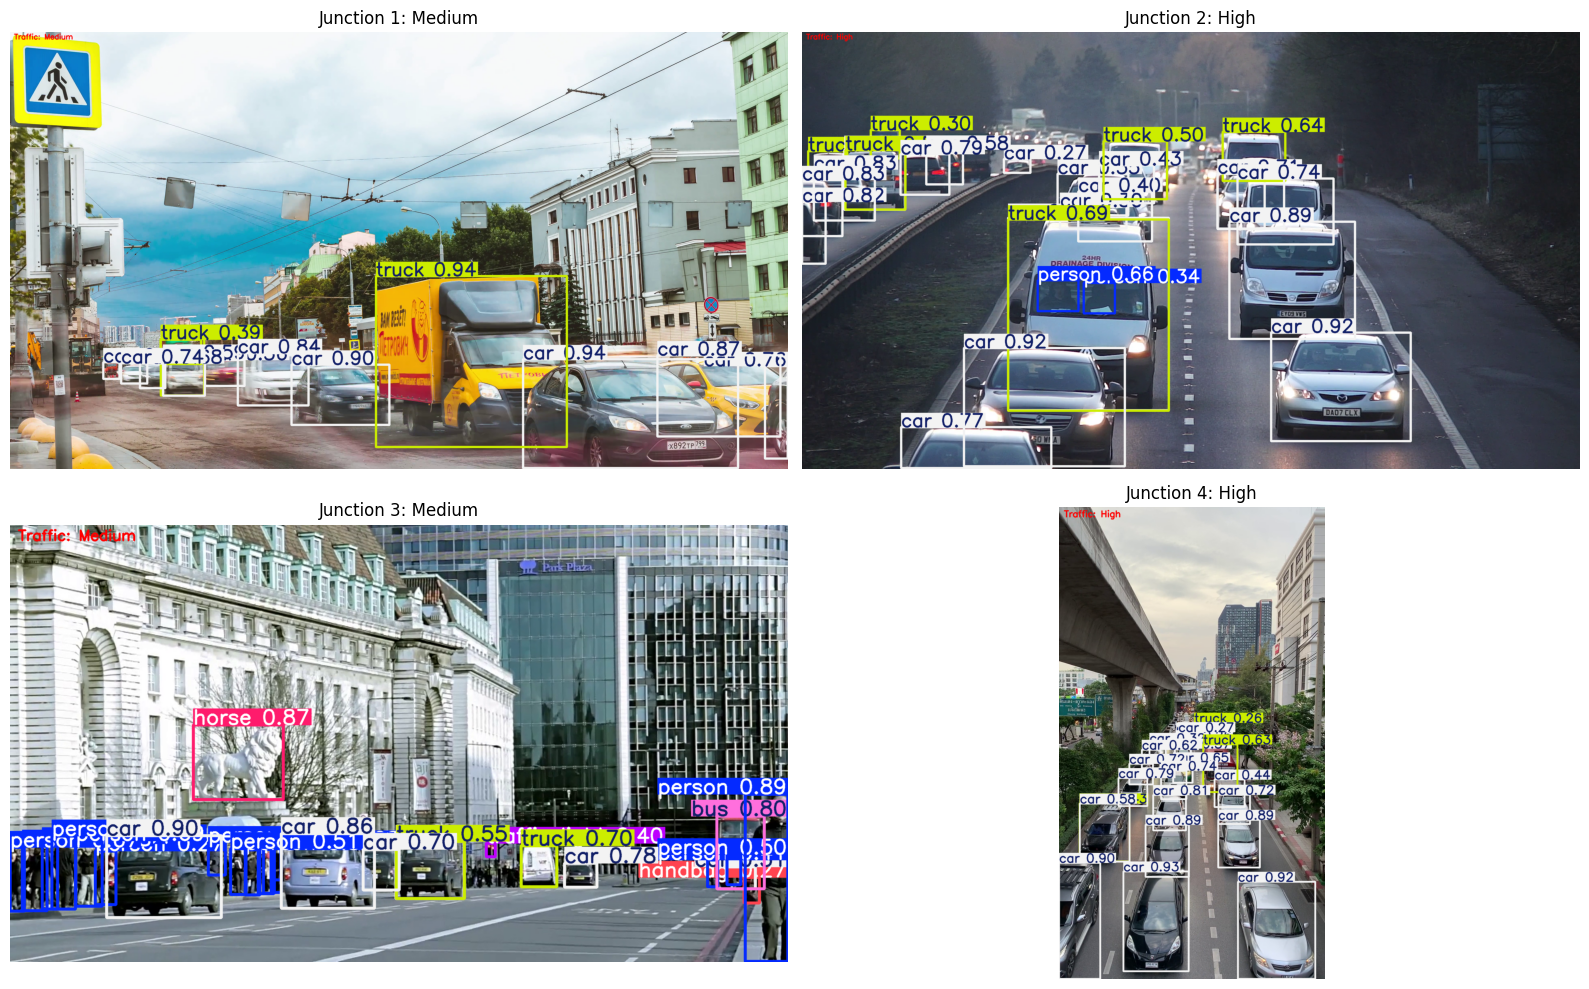

In [22]:
plt.figure(figsize=(16, 10))
for i, (level, image) in enumerate(results):
    if image is not None:
        plt.subplot(2, 2, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Junction {i + 1}: {level}")
        plt.axis('off')
plt.tight_layout()
plt.show()